# Rafael Espinosa Mena
rafaelespinosa4158@gmail.com\
May 2020\
Wine K-Means Clustering

In [1]:
import pandas as pd
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Read dataset into dataframe
df = pd.read_csv('wineQualityReds.csv')
pd.set_option("display.max_columns", None)

# Drop "wine" from dataframe given it is not important for predictions
df.drop(df.columns[0], axis = 1, inplace = True)

# Extract Quality and store it as the target matrix
qualityDf = df[['quality']]

# Drop quality to create the predictor matrix
df.drop('quality', axis=1, inplace=True)

# Print dataframe and quality
print("5) Full Data:\n", df)
print("5) Quality:\n", qualityDf, "\n")

5) Full Data:
       fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free.s

In [3]:
# Normalize dataframe
norm = Normalizer()
df_norm = pd.DataFrame(norm.transform(df), columns=df.columns)

# Print normalized dataframe
print("7) Normalized dataframe:\n", df_norm)

7) Normalized dataframe:
       fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0          0.195153          0.018460     0.000000        0.050107   0.002004   
1          0.107241          0.012099     0.000000        0.035747   0.001347   
2          0.135457          0.013198     0.000695        0.039942   0.001598   
3          0.174367          0.004359     0.008718        0.029580   0.001168   
4          0.195153          0.018460     0.000000        0.050107   0.002004   
...             ...               ...          ...             ...        ...   
1594       0.110886          0.010731     0.001431        0.035770   0.001610   
1595       0.089960          0.008386     0.001525        0.033544   0.000945   
1596       0.123069          0.009963     0.002540        0.044930   0.001485   
1597       0.105669          0.011552     0.002149        0.035820   0.001343   
1598       0.125899          0.006505     0.009862        0.075540   0.001406   

 

/Users/rafaelespinosa/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


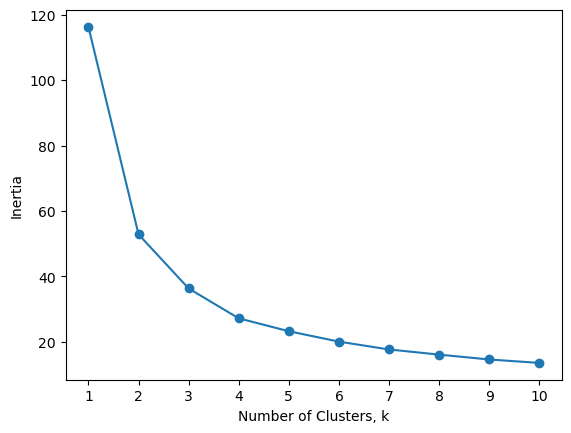

In [4]:
# Create a range of k values from 1:11
ks = range(1, 11)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df_norm)
    inertias.append(model.inertia_)
    
# Plot the chart for various k's
plt.plot(ks, inertias, "-o")
plt.xlabel("Number of Clusters, k")
plt.ylabel("Inertia")
plt.xticks(ks)
plt.show()

In [5]:
# 11) k clusters, using k=6
model = KMeans(n_clusters = 6, random_state = 2021, n_init=10)
model.fit(df_norm)
labels = model.predict(df_norm)
df_norm["Cluster label"] = pd.Series(labels)

In [6]:
# Add quality back to the dataframe
df_norm['quality'] = qualityDf

# Print Crosstab
cTab = pd.crosstab(index = df_norm['quality'], columns = df_norm['Cluster label'])
print("13. Crosstab:\n", cTab)

13. Crosstab:
 Cluster label    0    1    2   3    4   5
quality                                  
3                3    1    2   3    0   1
4                9    7    8  11    9   9
5               87  118  114  40  255  67
6              106  124  162  52   96  98
7               44   24   36  39   12  44
8                7    2    3   2    2   2
